## Ensemble Models

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Import data
X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

# probability=True ensures we can get prediction probabilities
dt = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
svc = SVC(kernel='linear', C=1, random_state=42, probability=True)

In [3]:
raw = [0.67, 0.70, 0.71, 0.64] # F1 scores for each model
weights = []

for i in range(4):
    weights.append(raw[i] / sum(raw))

In [4]:
# Create and fit the ensemble
ensemble = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svc', svc)],
                            voting='soft', weights=weights)
ensemble.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('lr', LogisticRegression()),
                             ('svc',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42))],
                 voting='soft',
                 weights=[0.2463235294117647, 0.25735294117647056,
                          0.26102941176470584, 0.23529411764705882])

In [5]:
# Make predictions on the test set
y_pred = ensemble.predict(X_test)

In [6]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9699769053117783
Precision: 0.8181818181818182
Recall: 0.7941176470588235
F1: 0.8059701492537314


In [7]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[393,   6],
       [  7,  27]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

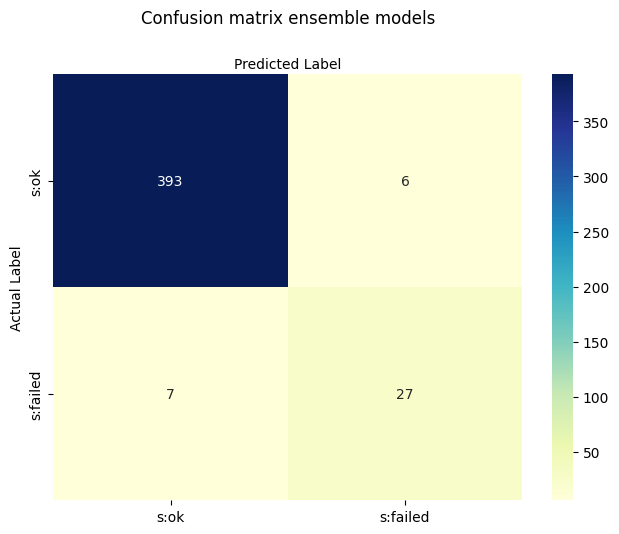

In [8]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix ensemble models', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')